<a href="https://colab.research.google.com/github/MonitSharma/Quantum-Finance-and-Numerical-Methods/blob/main/Simulating_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



# Introduction

A **Random Number Generator**  is a device that generates numbers or symbols that cannot be reasonably predicted better than by a random chance.

They can be true **Hardware random number generators** , generating genuinely random numbers, or pseudorandom number generators. The former are fundamentalyy more accuate, but are harder to build: examples thereof are based on microscopic phenomena such as thermal moise, or quantum physics. The latter are algorithms generating numbers whose properties approximate those of truly random numbers.

## Coint Tosses


In [3]:
import random

In [4]:
random.randint(0, 1)

1

In [5]:
[random.randint(0, 1) for _ in range(10)]

[0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

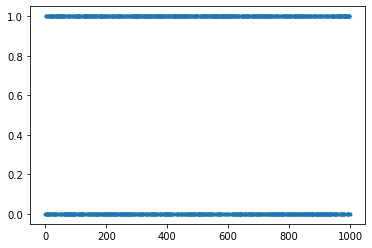

Number of zeros: 486
Number of ones: 514


In [6]:
n = 1000
random_data = np.array([random.randint(0, 1) for _ in range(n)])
plt.plot(range(n), random_data, '.')
plt.show()
print("Number of zeros:", n-np.sum(random_data))
print("Number of ones:", np.sum(random_data))

## The Uniform Random Variable

In [7]:
import scipy.stats

In [8]:
xx = np.linspace(scipy.stats.uniform.ppf(0.01),scipy.stats.uniform.ppf(0.99), 100)


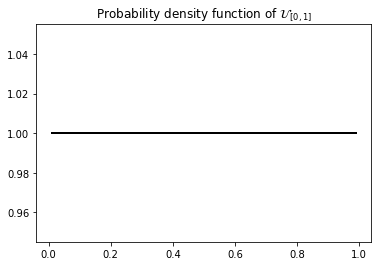

In [9]:
plt.plot(xx, scipy.stats.uniform.pdf(xx), 'k-', lw=2, label='pdf')
plt.title("Probability density function of $\mathcal{U}_{[0,1]}$")
plt.show()

If $X \sim \mathcal{U}_{[a, b]}$ , then 

$$ \mathbb{E}[X] = \frac{a+b}{2}
\qquad\text{and}\qquad
\mathbb{V}[X] = \frac{(b-a)^2}{12}$$ 

In [10]:
np.random.uniform()

0.5293871452904045

Let's generate some more of these

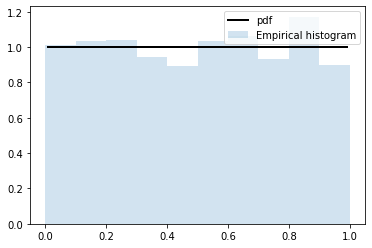

In [11]:
variates = np.random.uniform(size=1000)
plt.hist(variates, density=True, histtype='stepfilled', alpha=0.2, label='Empirical histogram')
plt.plot(xx, scipy.stats.uniform.pdf(xx), 'k-', lw=2, label='pdf')
plt.legend()

## Random Seed
One issue working with pseudorandom data is the lack of **reproducibility**. When computing the random variates, we obtain different sequences.

--------------

Even though they should have similar statistical properties, the difference may be enough to 'break' the results.

---------------


Example: a neural network, with weights and biases initialised to pseudorandom numbers, may calibrate well for some pseudorandom sequences and fail to calibrate for others.

In fact, pseudorandom sequences are (complex but deterministic) functions of the random seed, usually initialised using the system's clock.

In [12]:
random.seed(135)

### Example:

In [13]:
np.random.uniform(135)
np.random.uniform(size=10)

array([0.86596981, 0.05134063, 0.83409945, 0.21028226, 0.49015574,
       0.19387955, 0.23201622, 0.65713755, 0.15447041, 0.93815021])

## Normal (Gaussian) Random Variates

The Gaussian distribution, because of the **Central Limit Theorem (CLT)** is ubiquitous especially in Finance,

If $X\sim\mathcal{N}((\mu, \sigma^2)$ , then 
$$
\mathbb{E}[X] = \mu
\qquad\text{and}\qquad
\mathbb{V}[X] = \sigma^2.$$


-----------------


We'll now try to plot the following PDFs
$$
1. $\text{Normal}(\mu = 0, \sigma^2=0.2)$
2. $\text{Normal}(\mu = 0, \sigma^2=1)$
3. $\text{Normal}(\mu = 0, \sigma^2=5)$
4. $\text{Normal}(\mu = -2, \sigma^2=0.5)$

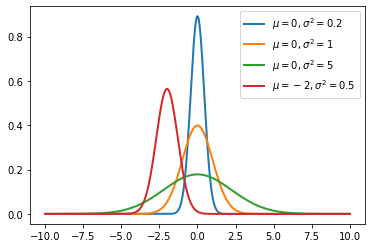

In [14]:
xx = np.linspace(-10., 10., 1000)
X = scipy.stats.norm(loc=0., scale=np.sqrt(.2))
plt.plot(xx, X.pdf(xx), '-', lw=2, label='$\mu=0, \sigma^2=0.2$')
X = scipy.stats.norm(loc=0., scale=np.sqrt(1.))
plt.plot(xx, X.pdf(xx), '-', lw=2, label='$\mu=0, \sigma^2=1$')
X = scipy.stats.norm(loc=0., scale=np.sqrt(5.))
plt.plot(xx, X.pdf(xx), '-', lw=2, label='$\mu=0, \sigma^2=5$')
X = scipy.stats.norm(loc=-2., scale=np.sqrt(.5))
plt.plot(xx, X.pdf(xx), '-', lw=2, label='$\mu=-2, \sigma^2=0.5$')
plt.legend(loc="best")
plt.show()

## Lindeberg–Lévy Central Limit Theorem

Let $\{X_1, \ldots, X_n\}$ be a sequence of random variables with $\mathbb{E}[X_i] = \mu$ and $\mathbb{V}[X_i] = \sigma^2 < \infty$ and 

$$ S_n := \frac{X_1 + \ldots + X_n}{n}. $$

**Law of Large Numbers**: $$ \frac{\sqrt{n}}{\sigma}(S_n - \mu) \overset{distribution}{\longrightarrow} \mathcal{N}(0, 1). $$




### The Box-Muller Transform

Suppose $U_1$ and $U_2$ are independent samples chosen from the uniform distribution on the unit interval $[0.1]$. Let 

$$ Z_0 = R \cos(\Theta) = \sqrt{-2\ln U_1}\cos(2\pi U_2),$$

$$ Z_1 = R \sin(\Theta) = \sqrt{-2\ln U_1}\sin(2\pi U_2). $$

Then $Z_0$ and $Z_1$ are independent random variables with a standard normal distribution.

### The Cholesky decomposition

The Cholesky decomposition of a symmetric positive-definite matrix $A$ is a decomposition of the form 
$$ A = LL^{T}$$

where $L$ is alower triangular matrix.


This can be implemented with `numpy.linalg.cholesky`



#### Exercise 
Generate $10,000$ two-dimensional random vectors with the covariance matrix:

$$ \begin{pmatrix} 25 & -7.5 \\ -7.5 & 9 \end{pmatrix}. $$



In [15]:
variates = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[25., -7.5], [-7.5, 9.]],
    size=10000)

In [16]:
print("Shape: ", np.shape(variates))
print("Covariance matrix: ", np.cov(variates.T))

Shape:  (10000, 2)
Covariance matrix:  [[24.76069931 -7.37877434]
 [-7.37877434  8.88007443]]


## Random Walk
For $n \in \mathbb{N}^*$ , let 

$$ \begin{equation*}
X_n = \left\{
        \begin{array}{ll}
          +1, & \hbox{with probability $\frac{1}{2}$,} \\
          -1, & \hbox{with probability $\frac{1}{2}$,}
        \end{array}
      \right.
\end{equation*} $$

thus each $X_n$ is a bernoulli random variable.

-------

Let $Y_0 -  0$ and for $ n \in \mathbb{N}^*$ , let

$$ \begin{equation*}
Y_n := \sum_{i=1}^n X_i.
\end{equation*} $$


The process $(Y_n)_{n\geq 0}$ is a **symmetric random walk**



For each choice of nonnegative integers $0 = i_0 < i_1 < \ldots < i_m, m \in \mathbb{N}^*$, the increments

$$ \begin{equation*}
Y_{i_{j+1}} - Y_{i_j} = \sum_{i = i_j + 1}^{i_{j+1}} X_i,
\end{equation*} $$

for $ j \in \{0, 1, \ldots, m - 1\} $, are independent variables, and note that


$$ \begin{align*}
\mathbb{E}[Y_{i_{j+1}} - Y_{i_j}] & = \mathbb{E}\left[\sum_{i = i_j + 1}^{i_{j+1}} X_i\right] = \sum_{i = i_j + 1}^{i_{j+1}} \mathbb{E}[X_i] = \sum_{i = i_j + 1}^{i_{j+1}} 0 = 0,\\
\mathbb{V}[Y_{i_{j+1}} - Y_{i_j}] & = \mathbb{V}\left[\sum_{i = i_j + 1}^{i_{j+1}} X_i\right] = \sum_{i = i_j + 1}^{i_{j+1}} \mathbb{V}[X_i] = \sum_{i = i_j + 1}^{i_{j+1}} 1 = i_{j+1} - i_j.
\end{align*}$$



-----------------

Furthermore , for each $n \in \mathbb{N}^0$, 

$$ \begin{equation*}
\mathbb{E}[Y_n] = 0, \quad \mathbb{V}[Y_n] = n.
\end{equation*}$$ 

For a given $N \in \mathbb{N}^*$ define the scaled symmetric random walk:

$$ \begin{equation*}
Z_t^{(N)} := \frac{1}{\sqrt{N}} Y_{Nt}
\end{equation*} $$

for all $t \in \left\{0, \frac{1}{N}, \frac{2}{N}, \ldots, \frac{N}{N}, \frac{N+1}{N}, \ldots\right\} =: T^{(N)}$ i,e such that $t$ that maked $Nt$ a non-negative intger, ensuring that $Y_{Nt}$ is well defined.


--------------


For this process for $s, t \in T^{(N)}$

$$ \begin{equation*}
\mathbb{E}[Z_t^{(N)} - Z_s^{(N)}] = 0, \quad \mathbb{V}\left[Z_t^{(N)} - Z_s^{(N)}\right] = t - s,
\end{equation*} $$

and 

$$ \begin{equation*}
\mathbb{E}[Z_t^{(N)}] = 0, \quad \mathbb{V}\left[Z_t^{(N)}\right] = t.
\end{equation*} $$



## Time Interpolation

We can turn the discrete-time process $Z^{N}$ into a continuous-time stochastic process by linear interpolation: for $ t \in [0, +\infty) $, define

$$ \hat{W}_t^{(N)} := Z_{\frac{n}{N}}^{(N)} + \left(t - \frac{n}{N}\right) \left[Z_{\frac{n+1}{N}}^{(N)} - Z_{\frac{n}{N}}^{(N)}\right], $$

where $n \in \mathbb{N}^0$, such that $\frac{n}{N} \leq t < \frac{n+1}{N}$


